In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics



In [9]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [10]:
import pandas
base = pandas.read_csv('bank.csv')
print(base.shape)

(4521, 17)


In [11]:
#Checking for duplicate data in the database
base.duplicated().sum()

0

In [14]:
#Checking for null data in the database
base.isnull().sum().sum()

0

In [13]:
#Database overview

base.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [15]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [16]:
base.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [17]:
cols= ['#1A5B6D','#D8C99B','#D8973C','#BD632F','#273E47']
sns.set(style="darkgrid")

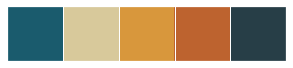

In [18]:
sns.palplot(cols)

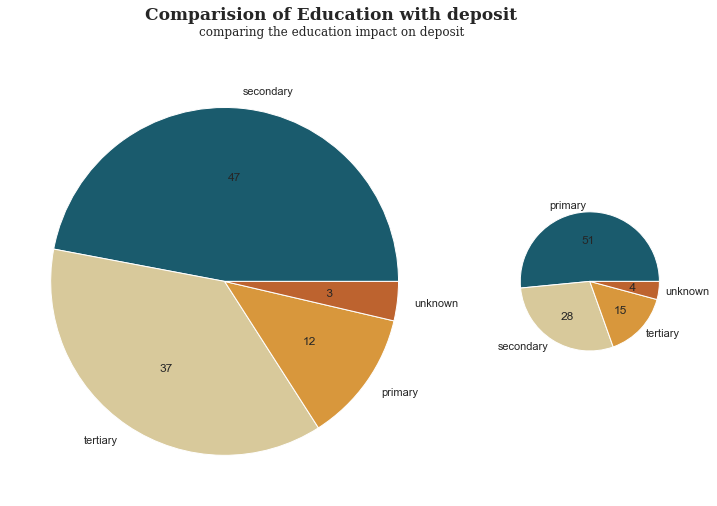

In [19]:
fig = plt.figure(figsize=(12,8))
plt.suptitle("Comparision of Education with deposit", family='Serif', size=17, ha='center', weight='bold')
plt.figtext(0.5,0.93,"comparing the education impact on deposit", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=1, ncols=2, width_ratios=[5,2])
ax1=plt.subplot(gs[0,0])
ax1=plt.pie(base[base['y']=='yes']['education'].value_counts(),
            labels=base[base['y']=='yes']['education'].unique(), autopct='%2d', colors=cols)
ax2=plt.subplot(gs[0,1])
ax2=plt.pie(base[base['y']=='no']['education'].value_counts(),
            labels=base[base['y']=='no']['education'].unique(), autopct='%2d', colors=cols)

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.suptitle("Comparision of Education with deposit", family='Serif', size=17, ha='center', weight='bold')
plt.figtext(0.5,0.93,"comparing the education impact on deposit", family='Serif', size=12, ha='center')
gs = GridSpec(nrows=1, ncols=2, width_ratios=[5,2])
ax1=plt.subplot(gs[0,0])
ax1=plt.pie(base[base['y']=='yes']['education'].value_counts(),
            labels=base[base['y']=='yes']['education'].unique(), autopct='%2d', colors=cols)
ax2=plt.subplot(gs[0,1])
ax2=plt.pie(base[base['y']=='no']['education'].value_counts(),
            labels=base[base['y']=='no']['education'].unique(), autopct='%2d', colors=cols)

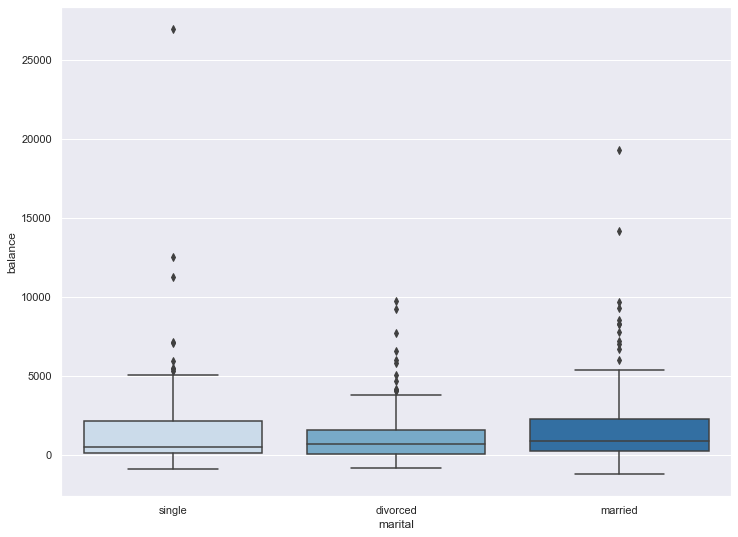

In [20]:
plt.figure(figsize=(12,9))
sns.boxplot(x="marital",y="balance", data=base[base['y']=='yes'], palette="Blues")
plt.show()

In [21]:
df_marital=base[["marital","previous"]]
df_marital.describe()

,previous
count,4521.000000
mean,0.542579
std,1.693562
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,25.000000


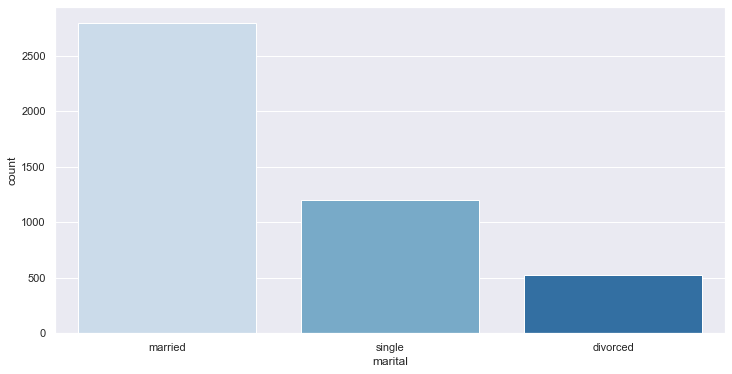

In [22]:
plt.figure(figsize=(12,6))
sns.countplot(x="marital",data=base, palette="Blues")
plt.show()

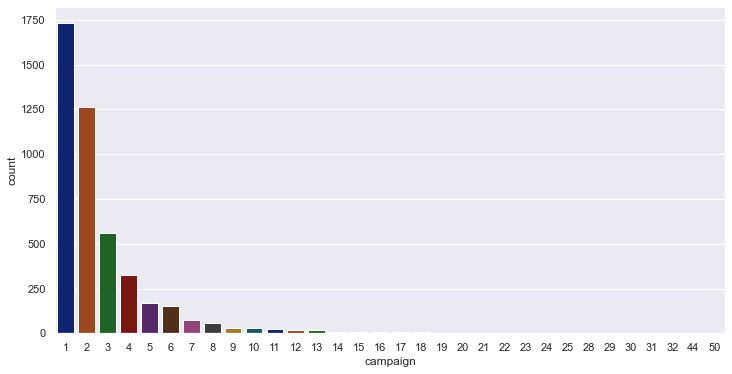

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x="campaign",data=base, palette="dark")
plt.show()

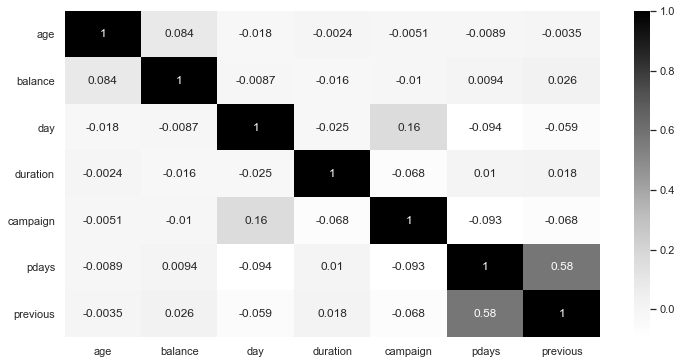

In [24]:
#Pearson correlations, which measures the strength of a linear relationship
plt.figure(figsize=(12, 6))
sns.heatmap(base.corr(method='pearson'), cmap="Greys", annot=True)
